# Analysis Plan

- Project: Spotify Listening Behavior — Time of Day Patterns
- Hypothesis: My Spotify listening peaks in the late afternoon and evening (3 PM–10 PM) when I am typically commuting, studying, or completing homework, and is significantly lower in the morning.

## 1. Main Question

### What time of day do I listen to music the most, and how does that pattern relate to my daily routine?

This question creates a purpose for my analysis: understanding how music fits into my habits and productivity throughout the day.

## 2. Hypothesis

### I hypothesize that my Spotify listening peaks during the late afternoon and evening (3 PM–10 PM), with noticeably lower activity in the morning.

This expectation is based on my daily schedule, since I tend to listen while walking to class, studying, working on projects later in the day, or working out.

## 3. Planned Analyses
### A. Time-of-Day Listening Trends (Primary Analysis)

Goal: Identify which hours of the day have the highest listening activity.

Justification: My dataset includes timestamps (endTime), making it possible to group plays by hour.

Methods:
- Get the hour from each timestamp
- Count number of plays per hour
- Sum total listening time (msPlayed) per hour

Visualize using:
- Line plot of plays by hour
- Bar chart of total minutes played per hour
- This directly tests the hypothesis.

### B. Day-of-Week Patterns (Secondary Analysis)

Goal: Determine whether weekday listening differs from weekend listening.

Justification: Helps compare the time-of-day patterns in relation to my school and work schedule.

Methods:
- Extract weekday name
- Group by weekday
- Compare weekday vs. weekend volume

This helps explain why certain hours spike.

### C. Total Listening Duration Patterns

Goal: See whether my “peak hours” also reflect longer listening sessions or just more frequent plays.

Justification: msPlayed allows me to measure intensity, not just count.

Methods:
- Convert msPlayed into minutes
- Analyze total listening time per hour
- Compare duration-based patterns vs. count-based patterns

This supports or challenges the hypothesis.

## 4. Analysis Techniques

To meet all project requirements, I will use:
- Data cleaning: Converting JSON timestamps to datetime
- Feature engineering: Creating hour, weekday, and total minutes
- Grouping and aggregation: groupby() for hour and weekday
- Summary statistics: Count, sum, unique values

Visualizations using matplotlib/seaborn:
- Line plot
- Bar chart
- Optional heatmap: hour × weekday

## 5. Starter Code

### Load the data

In [2]:
import pandas as pd

df = pd.read_json("/Users/lucyhennessy/Desktop/Spotify Account Data/StreamingHistory_music_0.json")
df.head()


,endTime,artistName,trackName,msPlayed
0,2024-11-11 02:33,Charles Wesley Godwin,Willing and Able,57800
1,2024-11-11 17:47,Niall Horan,Heaven,30965
2,2024-11-11 17:51,Mac Miller,Weekend (feat. Miguel),208080
3,2024-11-11 17:59,Zach Bryan,East Side of Sorrow,3529
4,2024-11-11 17:59,Zach Bryan,"Burn, Burn, Burn",1323


### Clean timestamps and create time features

In [3]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['hour'] = df['endTime'].dt.hour
df['weekday'] = df['endTime'].dt.day_name()
df['minutesPlayed'] = df['msPlayed'] / (1000*60)


### Plays by hour

In [4]:
plays_by_hour = df.groupby('hour').size()
plays_by_hour


hour
0     527
1     400
2     344
3     461
4     370
5     390
6     386
7     383
8     360
9     390
10    326
11    183
12    158
13    245
14    547
15    629
16    493
17    522
18    596
19    497
20    641
21    521
22    308
23    323
dtype: int64

### Visualization preview

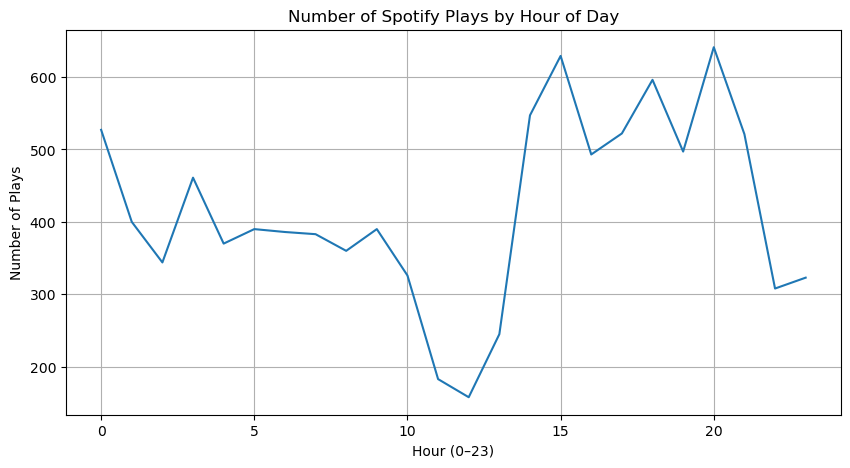

In [5]:
import matplotlib.pyplot as plt

plays_by_hour.plot(kind='line', figsize=(10,5))
plt.title("Number of Spotify Plays by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Plays")
plt.grid(True)
plt.show()


## 6. Early Interpretation
The dataset loads correctly and contains the fields needed for time-based analysis. Initial tests grouping data by hour show visible variation in listening activity throughout the day. While I haven't fully generated all visuals yet, the early aggregations confirm that the data is structured in a way that allows me to directly test whether late afternoon and evening hours contain the most listening activity.

The next steps include generating full visualizations, comparing duration vs. frequency patterns, and interpreting whether the trends support or contradict my hypothesis.